## Table of Contents
0. [Setting up imports](#imports) <pre>

1. [Framing the problem](#framing) <pre>

2. [Getting and understanding the data](#data-gather) <br/>
    2.1 [Importing the data](#data-import)<br/>
    2.2 [Data Exploration](#data-explore)<br/>
    2.3 [Data Visualization](#data-visualize) <br/>
    2.4 [Feature Engineering](#data-engineering) <pre>

3. [Data Preparation (Pipelining)](#pipelining) <br/>
    3.1 [Preprocessing](#Preprocessing) <pre>


4. [Model Exploration](#models) <br/>
    4.1 [K-Nearest Neighbours (KNN)](#KNN) <br/>
    4.2 [Neural Network](#nn) <pre>

5. [Discussion](#discussion)<br/>
    5.1 [Comparison](#compare) <br/>
    5.2 [Selected Model](#selected) <pre>

6. [Conclusion](#conclusion) <br/>
    6.1 [Advantages](#advantages) <br/>
    6.2 [Export model](#export) <pre>

7. [Sources and Credits](#creds)

# Setting up imports <a id="imports"></a>

In [142]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from utils import rwutils

# Scikit
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

# Framing the problem <a id="framing"></a>
Our problem is best framed as a multi-class single-label classification problem, which predicts whether a image will be in one of ten classes: 
<ul>
    <li>T-shirt/top</li>
    <li>Trouser</li>
    <li>Pullover</li>
    <li>Dress</li>
    <li>Coat</li>
    <li>Sandal</li>
    <li>Shirt</li>
    <li>Sneaker</li>
    <li>Bag</li>
    <li>Ankle boot</li>
</ul>

The data set contains a training set of 60,000 images and a test set of 10,000 images from Zalando's past articles.


# Getting and understanding the data <a id="data-gather"></a>

## Importing the data <a id="data-import"></a>

In [143]:
train = pd.read_csv("datasets/fashion-mnist_train.csv")

In [144]:
test = pd.read_csv("datasets/fashion-mnist_test.csv")

In [145]:
df = pd.concat([train, test])

We do a quick check to see if it looks like we expect...

In [146]:
display(train.head())

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


... and it does.

## Data Exploration <a id="data-explore"></a>
We need to explore the format of the data before training our model.

In [147]:
train.shape

(60000, 785)

In [148]:
print(train.info())
print()
display(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None



,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


We'll check the label distribution...

<AxesSubplot:>

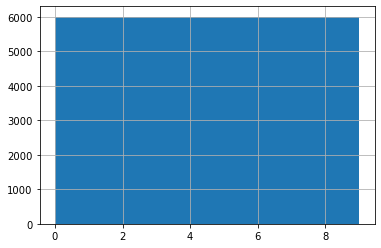

In [149]:
train.label.hist()

... and they seem perfectly distributed

Each image in the dataset is mapped to a single label. Since the labels are not included in with the dataset, we'll be storing them for later when plotting the images. We also want to store the number of classes as this will be useful when we build our model(s).

In [150]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
num_classes = len(class_names)

## Data Visualization <a id="data-visualize"></a>

In [151]:
x_temp = train.iloc[:,1:].values
y_temp = train.iloc[:,0].values

We want our data to be shaped as 28x28.

In [152]:
sample_img = x_temp[0].reshape(28,28)
sample_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   4,   0,   0,   0,   0,   0,  62,  61,  21,
         29,  23,  51, 136,  61,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  88, 201, 228, 225, 255, 115,
         62, 137, 255, 235, 222, 255, 135,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  47, 252, 234, 238, 224, 215, 215, 229,
        108, 180, 207, 214, 224, 231, 249, 254,  45,   0,   0,   0,   0,
          0,   0],
       [  

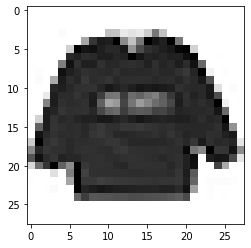

In [153]:
plt.imshow(sample_img, cmap=plt.cm.binary)

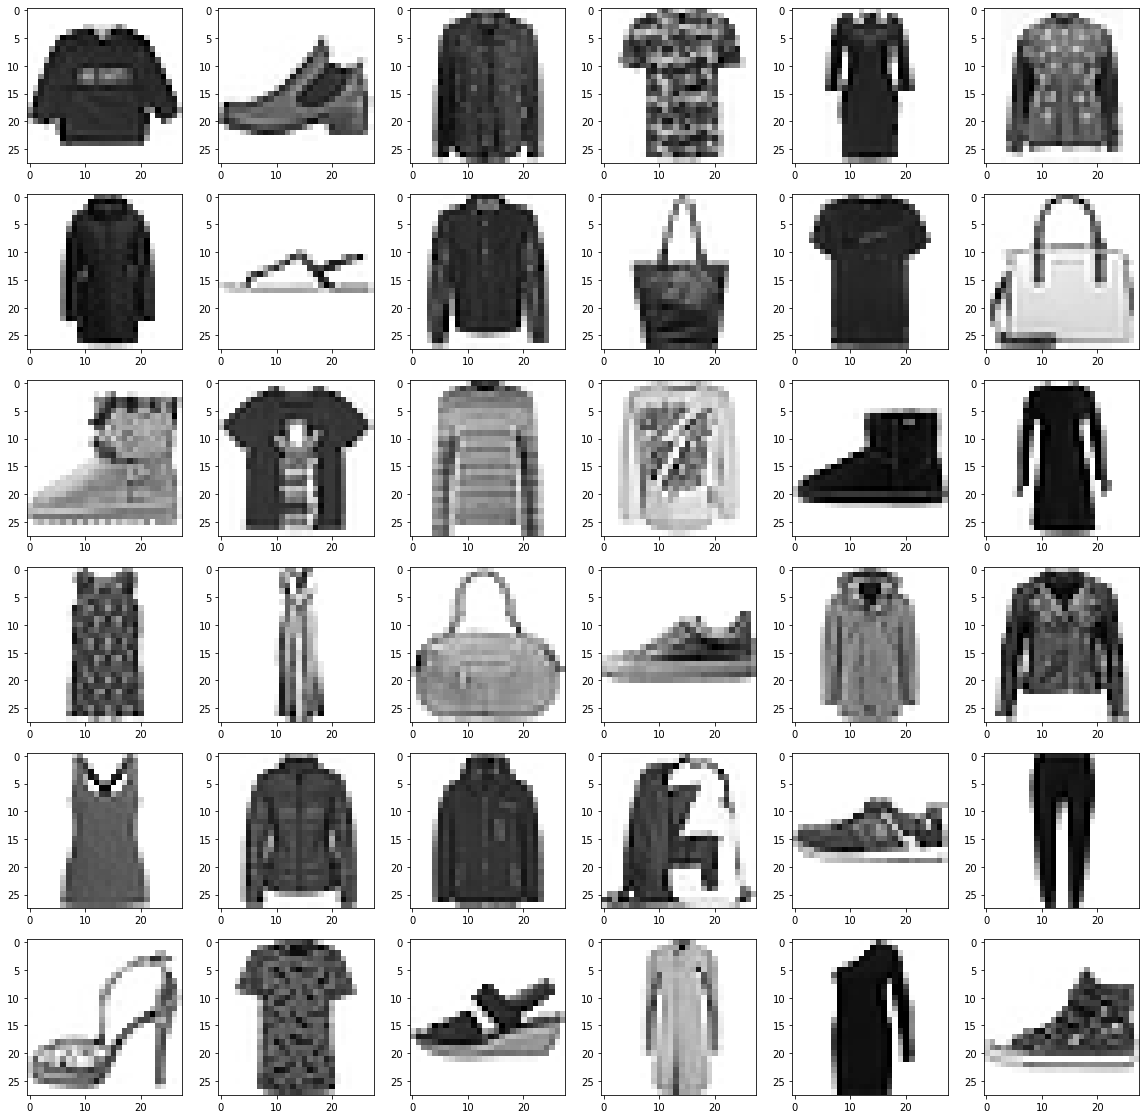

In [154]:
plt.figure(figsize=(20,20))
for i in range(36):
    curr = x_temp[i].reshape(28,28)
    plt.subplot(6, 6, (i+1))
    plt.imshow(curr, cmap=plt.cm.binary)

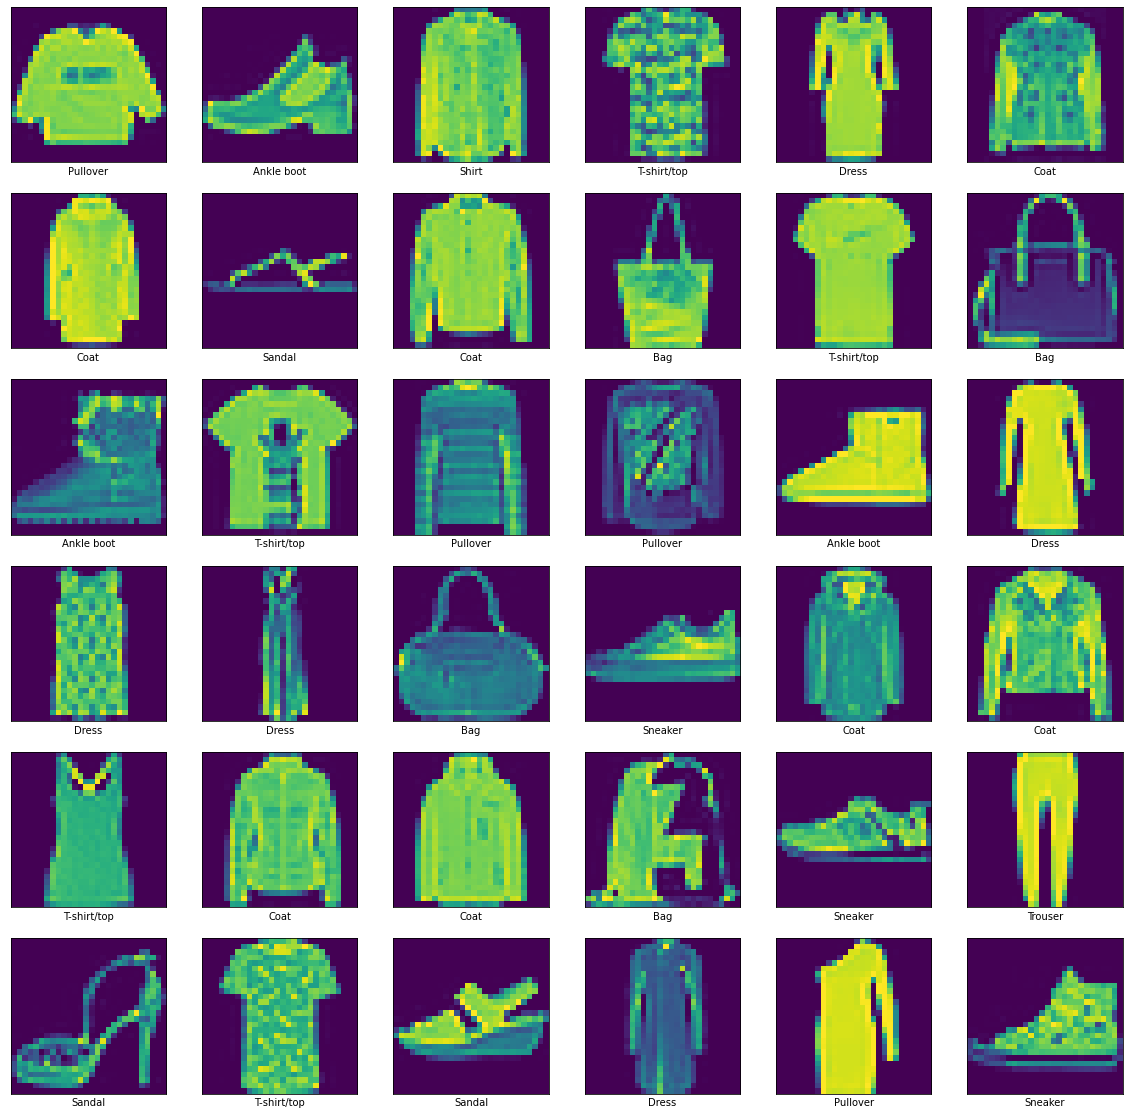

In [155]:
plt.figure(figsize=(20,20))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    curr = x_temp[i].reshape(28,28)
    plt.imshow(curr)
    plt.xlabel(class_names[y_temp[i]])

## Feature Engineering <a id="data-engineering"></a>
After testing one of our deployed models we found some inconsistencies in predictions, especially when predicting on shoe-categories. Left-facing shoes were mostly classified correctly, but right-facing shoes rarely got classified to the correct label. This made us think of creating new features for each of the shoe categories where each entry was flipped. After testing different approaches to this, we found it easier to do this flip on the request data from the user on the backend and feed our model the original image and the flipped image. With more time, an alternative solution could be to engineer these features for the model to train on.

# Data Preparation <a id="pipelining"></a>


Currently our data is stored in DataFrames, but we want it to be stored in arrays for later use. The data and labels will be stored separately.

In [156]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [157]:
X_train = train.iloc[:,1:].values
y_train = train.iloc[:,0].values

X_test = test.iloc[:,1:].values
y_test = test.iloc[:,0].values

In [158]:
# Checking the data type of x and y
print("Label y data type       :", y.dtype)
print("Image pixel x data type :", x.dtype)

Label y data type       : int64
Image pixel x data type : int64


## Preprocessing the data
If we inspect one of the images in the training set we can see that the pixel values are in range of 0 to 255:

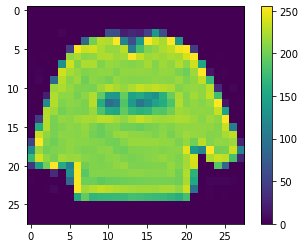

In [159]:
plt.figure()
plt.imshow(X_train[0].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

Before feeding our model we want to scale these values to a range of 0 to 1. We do this for both the <i>training set</i> and the <i>test set</i>:

In [160]:
X_train = X_train / 255.0
X_test = X_test / 255.0

The models we are training require different input shapes.

In [161]:
## KNN
X_train_knn = X_train
X_test_knn  = X_test
y_train_knn = y_train
y_test_knn  = y_test

In [162]:
X_train = X_train.reshape(len(X_train), 28, 28)
X_test = X_test.reshape(len(X_test), 28, 28)

# K-Nearest Neighbors <a id="exploration"></a>

Our first approach to this problem is to use K-Nearest Neighbors classifier from Scikit-Learn. As it is a relatively simple supervised classifier, it does not take any parameters other than K. Which is how far from a current point it will classify data together. To find the optimal K, we will test a range of K-values and plot them out to find the optimal K for our dataset. Before doing this, we predict a K in the range of 4-7, as a low K will lead to a non-represantative classifier, and too high of a K will give us too much noise to be usable. In this inital run we test K from 1 to 15.

Wall time: 2min 51s


Text(0, 0.5, 'Error Rate')

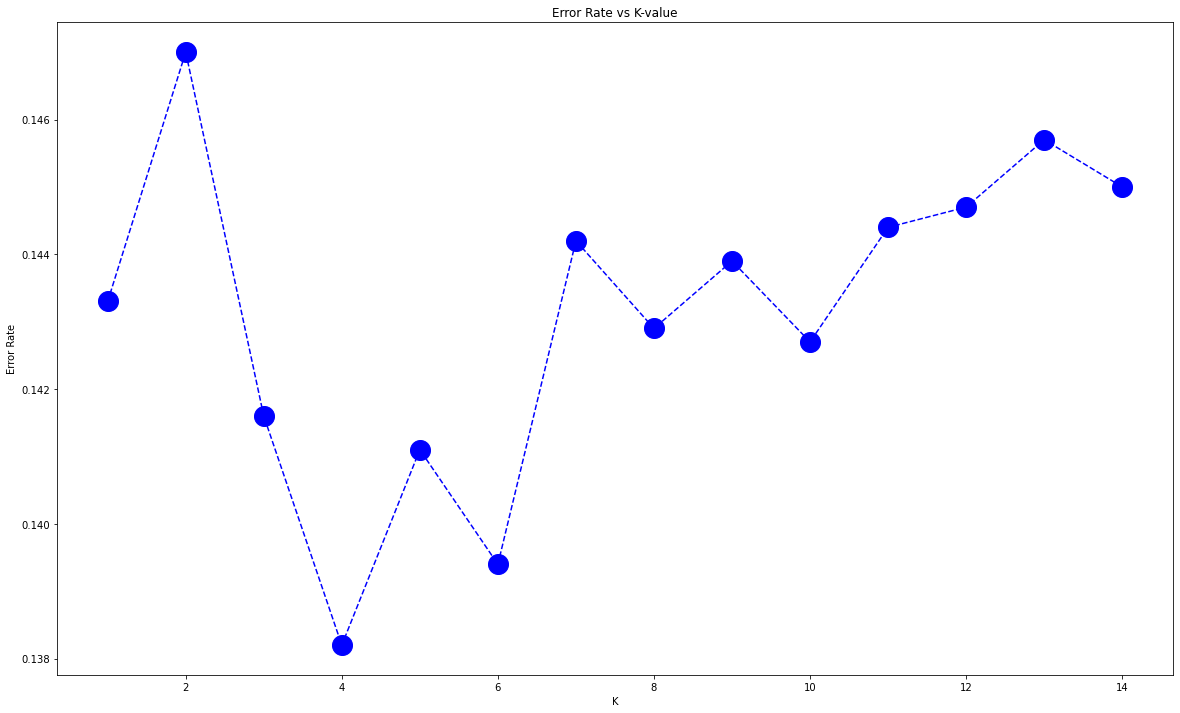

In [163]:
%%time

lower_bound = 1
upper_bound = 15

error_rate = []

for i in range(lower_bound, upper_bound):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_knn, y_train_knn)
    pred_i = knn.predict(X_test_knn)
    error_rate.append(np.mean(pred_i != y_test_knn))

plt.figure(figsize=(20,12))

plt.plot(range(lower_bound, upper_bound), error_rate, color="blue", linestyle="dashed", marker="o", markersize=20)

plt.title("Error Rate vs K-value")

plt.xlabel("K")
plt.ylabel("Error Rate")

It is quite clear from the figure above that <i>n_neighbors=4</i> yields the lowest error rate. This is within the range of what we predicted.

In [164]:
clf = KNeighborsClassifier(n_neighbors=4)

In [165]:
clf.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=4)

In [166]:
%%time
y_pred = clf.predict(X_test_knn)

Wall time: 12.8 s


## Evaluation

In [167]:
accuracy_score(y_test_knn, y_pred)

0.8618

[Text(0, 0.5, 'T-shirt/top'),
 Text(0, 1.5, 'Trouser'),
 Text(0, 2.5, 'Pullover'),
 Text(0, 3.5, 'Dress'),
 Text(0, 4.5, 'Coat'),
 Text(0, 5.5, 'Sandal'),
 Text(0, 6.5, 'Shirt'),
 Text(0, 7.5, 'Sneaker'),
 Text(0, 8.5, 'Bag'),
 Text(0, 9.5, 'Ankle boot')]

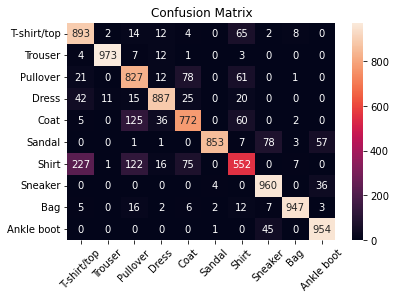

In [168]:
cm = confusion_matrix(y_test_knn, y_pred)

ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax)

ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(class_names, rotation=45)
ax.yaxis.set_ticklabels(class_names, rotation=0)

The confusion matrix summarizes the number of correct and incorrect predictions for each class which can help us visualize where the model makes mistakes. It is clear from the matrix that clothing of similar shapes are mislabeled more often than the ones with distinct shapes. We think this is because of the resolution of the MNIST-format. A shirt is often mistaken for a t-shirt, pullover or coat, this could be because the defining characteristics of a shirt is often the length of an arm or the collar. Details, like the collar, are often not visible when the image is scaled down.

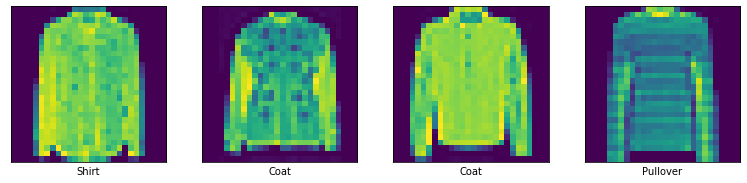

In [169]:
plt.figure(figsize=(20,20))
indices = [2,5,8,14]
for i in range(len(indices)):
    plt.subplot(6, 6, (i+1))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    a = x_temp[indices[i]].reshape(28,28)
    plt.imshow(a)
    plt.xlabel(class_names[y_temp[indices[i]]])

These four images show how similar these items can look when they are processed and ready for the model to train or predict on.

In [207]:
report_knn = classification_report(y_test_knn, y_pred, target_names=class_names, output_dict=True)
report_knn_print = classification_report(y_test_knn, y_pred, target_names=class_names)
print(report_knn_print)

              precision    recall  f1-score   support

 T-shirt/top       0.75      0.89      0.81      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.73      0.83      0.78      1000
       Dress       0.91      0.89      0.90      1000
        Coat       0.80      0.77      0.79      1000
      Sandal       0.99      0.85      0.92      1000
       Shirt       0.71      0.55      0.62      1000
     Sneaker       0.88      0.96      0.92      1000
         Bag       0.98      0.95      0.96      1000
  Ankle boot       0.91      0.95      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



As with the confusion matrix, the classification report builds upon the hypothesis of similar-shaped clothing items being mislabeled more often.

## PCA
We considered using PCA to optimize our dataset, but it seems PCA is mostly relegated to datasets with highly related and/or correlated data points, like the iris' datasets sepal length and width. This does not apply here, as each data point is a separate, non-related category of clothing articles. We could bulk together similar looking articles of clothing, i.e shirts, t-shirts, pullover and coats in one component, and sneakers and sandals in one component, but this would ultimately over-simplify the solution to our problem and circumnavigate the point of the dataset.

# Neural Network

## Setting up layers
We will be using the Sequential model as our network consists of a linear stack of layers.

We need to think about which layers we want to chain together. 

First we'll <i>flatten</i> to transform the images from a 2d-array of 28 by 28 pixels to a 1d-array of 784 pixels. This is only to reformat the data and has no parameters for the model to learn.

In [171]:
model = keras.Sequential([
    keras.Input(shape=(28,28)),
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

## Compile the model
Before training the model we have to configure the learning process which is done by the <i>compile</i> method. It takes three arguments:

<ul>
    <li><i>Optimizer</i> helps us get results faster by updating attributes such as weights and learning rate to reduce the loss function.<br> The Adam algorithm is a popular algorithm which efficiently solves practical deep learning problems (Brownlee, 2017). It combines the advantages of two extensions of stochastic gradient descent, AdaGrad and RMSProp, to realize the benefits of both of them.</li>
    <li><i>Loss function</i> is the objective our model will try to minimize. It measures how accurate our model is during training. We will be using SparseCategoricalCrossentropy which trains the model to output a probability over the 10 classes for each image.</li>
    <li><i>Metrics</i> are used to monitor training and testing. In this notebook we will use <i>accuracy</i> which calculates how often predictions equal the correct labels.</li>
</ul>

In [172]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

## Training the model
Keras models are trained on Numpy arrays of input data and labels. These were prepared earlier and we will now use them in the <i>fit</i> method to train our model.

In [173]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 1s 565us/step - loss: 0.5015 - accuracy: 0.8236
Epoch 2/20
1875/1875 [==============================] - 1s 557us/step - loss: 0.3831 - accuracy: 0.8621
Epoch 3/20
1875/1875 [==============================] - 1s 551us/step - loss: 0.3433 - accuracy: 0.8744
Epoch 4/20
1875/1875 [==============================] - 1s 551us/step - loss: 0.3156 - accuracy: 0.8838
Epoch 5/20
1875/1875 [==============================] - 1s 573us/step - loss: 0.2991 - accuracy: 0.8894
Epoch 6/20
1875/1875 [==============================] - 1s 548us/step - loss: 0.2857 - accuracy: 0.8940
Epoch 7/20
1875/1875 [==============================] - 1s 551us/step - loss: 0.2722 - accuracy: 0.8989
Epoch 8/20
1875/1875 [==============================] - 1s 680us/step - loss: 0.2599 - accuracy: 0.9029
Epoch 9/20
1875/1875 [==============================] - 1s 695us/step - loss: 0.2492 - accuracy: 0.9062
Epoch 10/20
1875/1875 [==============================] - 1s 564u

## Evaluate accuracy
Now that we have fitted our model we want to evaluate it. This is done by using the <i>evalute</i> method which returns the loss and accuracy of the model.

In [174]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy:", test_acc)

313/313 [==============================] - 0s 456us/step - loss: 0.3124 - accuracy: 0.8951
Test accuracy: 0.8950999975204468


## Making predictions
Now that our model is trained, we can use it to make predictions on the test set.

In [175]:
predictions = model.predict(X_test)

In [176]:
predictions[0]

array([9.1583771e-01, 1.4981271e-12, 6.9531670e-05, 5.9389731e-06,
       7.4178308e-07, 4.4626489e-18, 8.4086128e-02, 2.1524689e-20,
       5.8309713e-10, 1.3562810e-14], dtype=float32)

We can see from the first prediction that we get an array with ten (10) entries for each prediction. These entries represent our models confidence that the input image correspond to each of the ten (10) items. We can use this array to find the item with the highest confidence:

In [177]:
predicted_class = np.argmax(predictions[0])
print("%d %s" % (predicted_class, class_names[predicted_class]))

0 T-shirt/top


Checking the test labels shows that the prediction is correct.

In [178]:
y_test[0]

0

[Text(0, 0.5, 'T-shirt/top'),
 Text(0, 1.5, 'Trouser'),
 Text(0, 2.5, 'Pullover'),
 Text(0, 3.5, 'Dress'),
 Text(0, 4.5, 'Coat'),
 Text(0, 5.5, 'Sandal'),
 Text(0, 6.5, 'Shirt'),
 Text(0, 7.5, 'Sneaker'),
 Text(0, 8.5, 'Bag'),
 Text(0, 9.5, 'Ankle boot')]

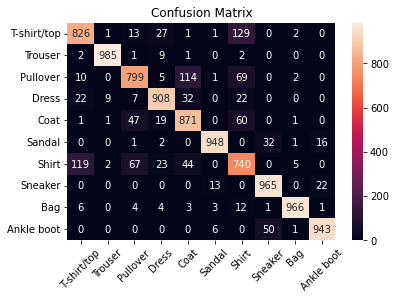

In [179]:
predicted_classes = [np.argmax(x) for x in predictions]

cm = confusion_matrix(y_test, predicted_classes)

ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax)

ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(class_names, rotation=45)
ax.yaxis.set_ticklabels(class_names, rotation=0)

In [206]:
report_nn = classification_report(y_test_knn, predicted_classes, target_names=class_names, output_dict=True)
report_nn_print = classification_report(y_test, predicted_classes, target_names=class_names)

print(report_nn_print)

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.83      0.83      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.85      0.80      0.82      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.82      0.87      0.84      1000
      Sandal       0.98      0.95      0.96      1000
       Shirt       0.72      0.74      0.73      1000
     Sneaker       0.92      0.96      0.94      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.96      0.94      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Convolutional Neural Network
Convolutional Neural Network (CNN) specializes in processing data with a grid-like structure, such as images (Mishra, 2020). It takes input images and assigns learnable weights and biases to aspects of each image to be able to differentiate them.

In [181]:
model_cnn = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax")
])

The CNN model takes a 4-dimensional shape instead of the 3-dimensional shape we have had earlier. We therefore need to expand the dimensions of our training input and test input.

In [182]:
X_train_cnn = np.expand_dims(X_train, -1)
X_test_cnn = np.expand_dims(X_test, -1)

## Compile the model
We use the same parameters as we did with the neural network.

In [183]:
model_cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [184]:
batch_size = 100
epochs = 15

model_cnn.fit(X_train_cnn, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/15
600/600 [==============================] - 7s 11ms/step - loss: 0.6420 - accuracy: 0.7657
Epoch 2/15
600/600 [==============================] - 7s 12ms/step - loss: 0.4247 - accuracy: 0.8475
Epoch 3/15
600/600 [==============================] - 7s 12ms/step - loss: 0.3791 - accuracy: 0.8658
Epoch 4/15
600/600 [==============================] - 8s 13ms/step - loss: 0.3504 - accuracy: 0.8732
Epoch 5/15
600/600 [==============================] - 7s 11ms/step - loss: 0.3280 - accuracy: 0.8837
Epoch 6/15
600/600 [==============================] - 7s 11ms/step - loss: 0.3156 - accuracy: 0.8866
Epoch 7/15
600/600 [==============================] - 7s 12ms/step - loss: 0.3030 - accuracy: 0.8903
Epoch 8/15
600/600 [==============================] - 7s 11ms/step - loss: 0.2950 - accuracy: 0.8934
Epoch 9/15
600/600 [==============================] - 6s 10ms/step - loss: 0.2875 - accuracy: 0.8957
Epoch 10/15
600/600 [==============================] - 6s 10ms/step - loss: 0.2788 - accura

In [185]:
test_loss, test_acc = model_cnn.evaluate(X_test_cnn, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2372 - accuracy: 0.9140


In [186]:
predictions_cnn = model_cnn.predict(X_test_cnn)

predicted_cnn = [np.argmax(x) for x in predictions_cnn]

In [200]:
report_cnn = classification_report(y_test, predicted_cnn, target_names=class_names, output_dict=True)
report_cnn_print = classification_report(y_test, predicted_cnn, target_names=class_names)

print(report_cnn_print)

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.90      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.82      0.91      0.86      1000
       Dress       0.92      0.93      0.92      1000
        Coat       0.86      0.88      0.87      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.83      0.64      0.72      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.99      0.98      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# Discussion


## Comparison<a id="compare"></a>

In [212]:
def compareModels(report1, report2):
    for label in class_names:
        print(label, ": " ,report1[label]["f1-score"] - report2[label]["f1-score"])

In this part, we will compare our models, we suspect that the neural network models will surpass the k-nearest neighbour model easily.
Furthermore, we also suspect that the convolutional nn model will outperform the "basic" neural network model.
Our findings will be commented by the code.

In [213]:
# All integers are positive, we can conclude that the nn model is superior to the knn model.
compareModels(report_nn, report_knn)

T-shirt/top :  0.018896041063044322
Trouser :  0.0066201077776318895
Pullover :  0.04651509012662425
Dress :  0.012498525341095634
Coat :  0.0558218266852214
Sandal :  0.04425614517219556
Shirt :  0.10740556605128548
Sneaker :  0.02460078573135749
Bag :  0.014345812062771857
Ankle boot :  0.020832369373138704


In [214]:
# All integers are positive other than for Shirt, but this is by 0.4%, in the other items, it is superior. 
# We can conclude that the cnn model is superior to the nn model.
compareModels(report_cnn, report_nn)

T-shirt/top :  0.03535722143551545
Trouser :  0.0010010010010008674
Pullover :  0.039370956348731
Dress :  0.011492101267879806
Coat :  0.02316141585116882
Sandal :  0.02241052149447098
Shirt :  -0.004562039241523652
Sneaker :  0.018695031811377327
Bag :  0.005380938084570741
Ankle boot :  0.016595127289887768


With these findings, we will use the CNN model for our deployment.

In [215]:
#Export model, for use in backend of web deployment
model_cnn.save("./models/cnn/", include_optimizer=True)

INFO:tensorflow:Assets written to: ./models/cnn/assets


For testing the deployment of this machine learning model, visit our site at:
<a href="www.dat158.netlify.app"> Frontend </a>

The repos for this project are available at:

<ul>
<li><a href="https://github.com/MrHencke/DAT158-ML-Oblig2-ML/">ML Model and notebook</a></li>
<li><a href="https://github.com/MrHencke/DAT158-ML-Oblig2-Frontend/">React Frontend</a></li>
<li><a href="https://github.com/MrHencke/DAT158-ML-Oblig2-Backend/">Flask Backend</a></li>
</ul>

# Sources

<ul>
    <li>
        Brownlee, J. (2017, July 3) <i>Gentle Introduction to the Adam Optimization Algorithm for Deep Learning</i><br>
        https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
    </li>
    <br>
    <li>
        Stöter, F.R. (n.d) <i>Keras: Deep Learning library for Theano and TensorFlow</i><br>
        https://faroit.com/keras-docs/1.2.0/ 
    </li>
    <br>
    <li>
        Mishra, M (2020, August 26) <i>Convolutional Neural Networks, Explained</i><br>
        https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939
    </li>
    <br>
    <li>
        Saha, S (2018, December 15) <i>A Comprehensive Guide to Convolutional Neural Networks</i><br>
        https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
    </li>
</ul>